# Mini project

this project show the Salary regarding for years experience 
***************************
so in this project we will aprove each part on linear regression and how polynomial regression make a good soloution

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Read the dataset 

In [6]:
data = pd.read_csv(r"Salary_Data.csv") # real
data.tail()
data.info()
data.describe()
def readdata():
    pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


display the distribution of dataset

<Figure size 300x300 with 0 Axes>

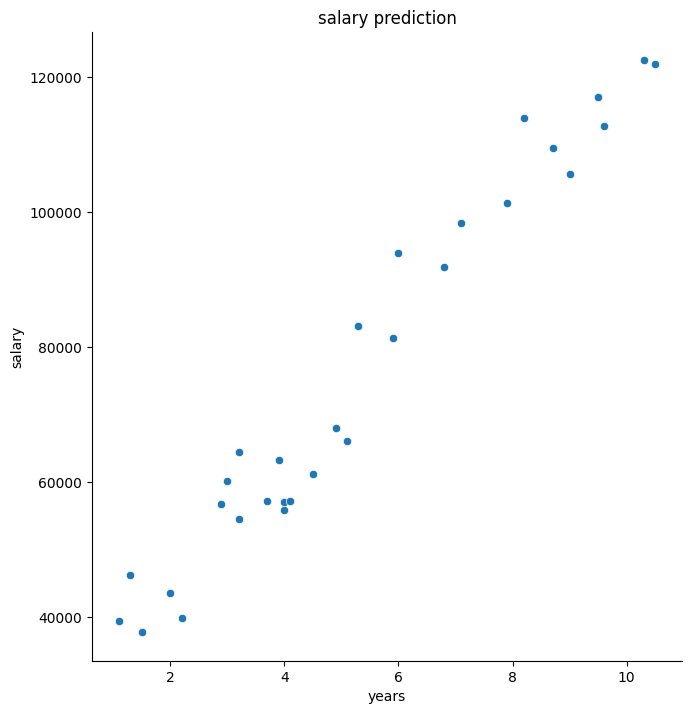

In [9]:

plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()




preprocessing steps to splite the dataset for coloumn represent X and Y 

In [10]:
#%%
# cooking the data 
X = data.iloc[:,:-1]
y = data.iloc[:,1]

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state = 10)

call polynomail class

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)





y_poly_pred_train = poly_model.predict(X_poly_train)
y_poly_pred_test = poly_model.predict(X_poly_test)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_model.predict(X_range_poly)


compare between linear and polynomail

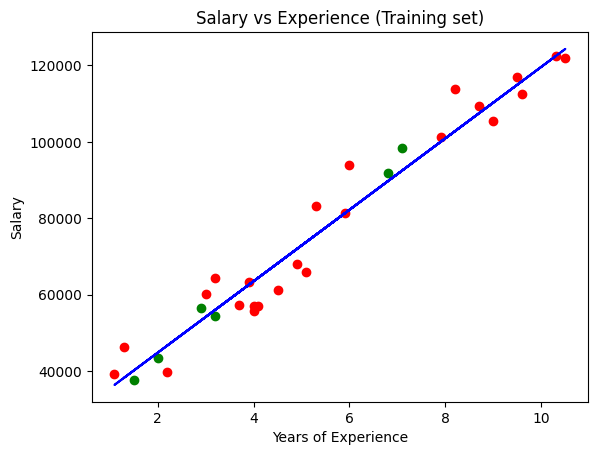

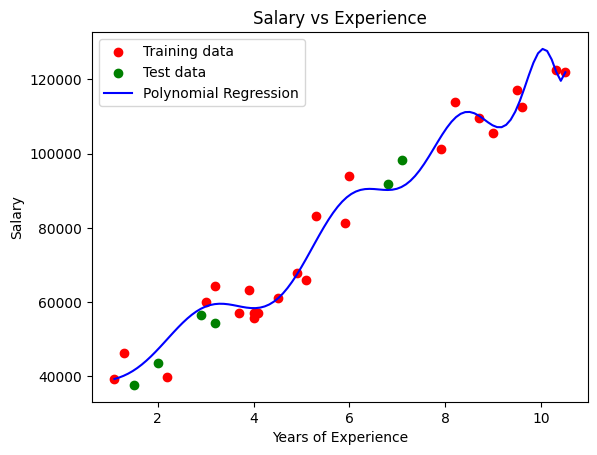

In [14]:

my_model = LinearRegression()
my_model.fit(X_train,y_train)
#%%
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, my_model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()




compare between Actual values and prediction values

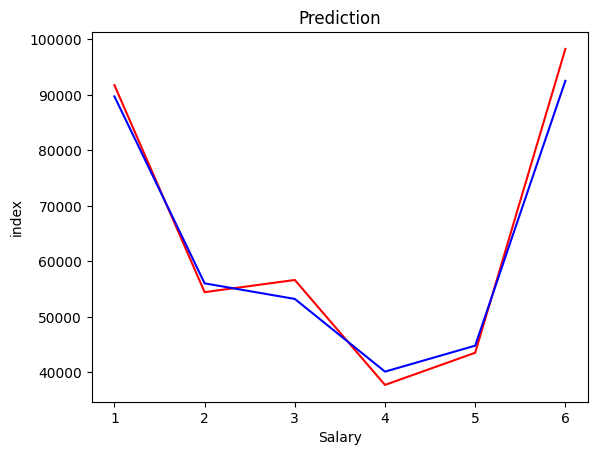

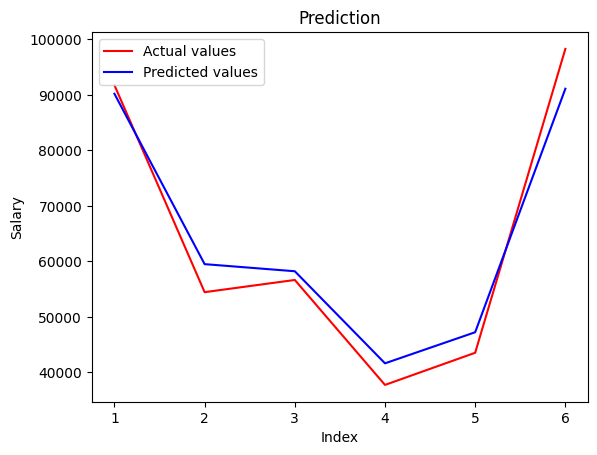

In [15]:
y_pred = my_model.predict(X_test)
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()
#%%
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual values')
plt.plot(c, y_poly_pred_test, color='b', linestyle='-', label='Predicted values')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Prediction')
plt.legend()
plt.show()


 plotting the error


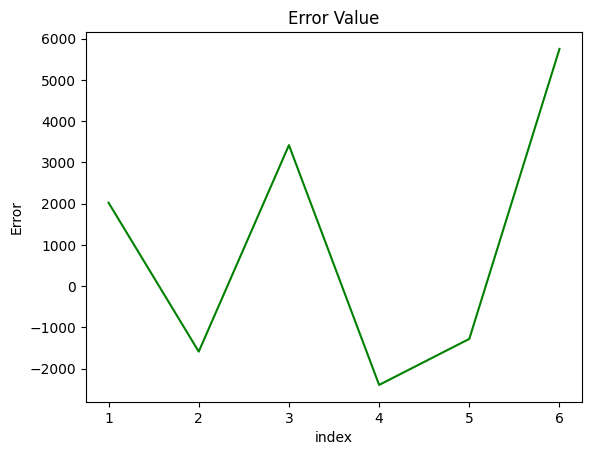

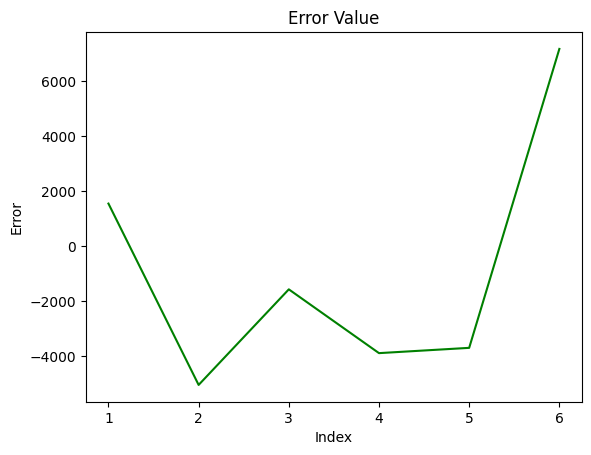

In [16]:
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test - y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

plt.plot(c, y_test - y_poly_pred_test, color='green', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()


In [17]:
mse = mean_squared_error(y_test,y_poly_pred_test)
r2 = r2_score(y_test,y_poly_pred_test)
print("MSE: ",mse)
print("R2: ",r2)
print ('Intercept of the model: ', poly_model.intercept_)
print ('Coefficients of the model: ', poly_model.coef_)
y_hat = 9356 * 4.5  + 26089 
print ('Predicted value of y: ', y_hat)

MSE:  18440687.512780067
R2:  0.9654054168150664
Intercept of the model:  38378.92964680989
Coefficients of the model:  [ 0.00000000e+00  1.15910297e+01  3.85006628e+01  9.09048430e+01
  1.72324705e+02  2.49525289e+02  2.17322131e+02 -2.61767833e+01
 -2.30233348e+02  1.61748485e+02 -5.15311479e+01  9.42918556e+00
 -1.05462674e+00  7.15027273e-02 -2.70748861e-03  4.40338598e-05]
Predicted value of y:  68191.0


# calculate Mean square error and R^2


In [18]:
#%%
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('R² score :',rsq)
#%%
# Intecept and coeff of the line
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

y_hat = 9356 * 4.5 +  26089 
print(y_hat)
print('################################################')
print('*************************************************\n')

mse = mean_squared_error(y_test, y_poly_pred_test)
rsq = r2_score(y_test, y_poly_pred_test)
print('Mean Squared Error:', mse)
print('R² score:', rsq)

print('Intercept of the model:', poly_model.intercept_)
print('Coefficients of the model:', poly_model.coef_)


y_hat = poly_model.predict(poly.transform([[4.5]]))
print('Predicted Salary for 4.5 years of experience:', y_hat[0])


mean squared error : 9785570.138914317
R² score : 0.9816423482070253
Intercept of the model: 26089.096632416724
Coefficient of the line: [9356.86299354]
68191.0
################################################
*************************************************

Mean Squared Error: 18440687.512780067
R² score: 0.9654054168150664
Intercept of the model: 38378.92964680989
Coefficients of the model: [ 0.00000000e+00  1.15910297e+01  3.85006628e+01  9.09048430e+01
  1.72324705e+02  2.49525289e+02  2.17322131e+02 -2.61767833e+01
 -2.30233348e+02  1.61748485e+02 -5.15311479e+01  9.42918556e+00
 -1.05462674e+00  7.15027273e-02 -2.70748861e-03  4.40338598e-05]
Predicted Salary for 4.5 years of experience: 60923.031783481434


### test your new data by user

In [19]:
age_exp=float(input('inter your  years experience ' ))

In [20]:
y_hat = 9356 * age_exp +  26089 
print('your salary expect regarding for your number of age eperience is  :  ',y_hat)

your salary expect regarding for your number of age eperience is  :   119649.0


### apply some unseening data and disply that 

Years of Experience: 1.0, Predicted Salary: 39021.34891182316
Years of Experience: 3.0, Predicted Salary: 58818.97289352522
Years of Experience: 4.5, Predicted Salary: 60923.03178354104
Years of Experience: 7.8, Predicted Salary: 102292.40669759114
Years of Experience: 9.8, Predicted Salary: 123287.40425618489


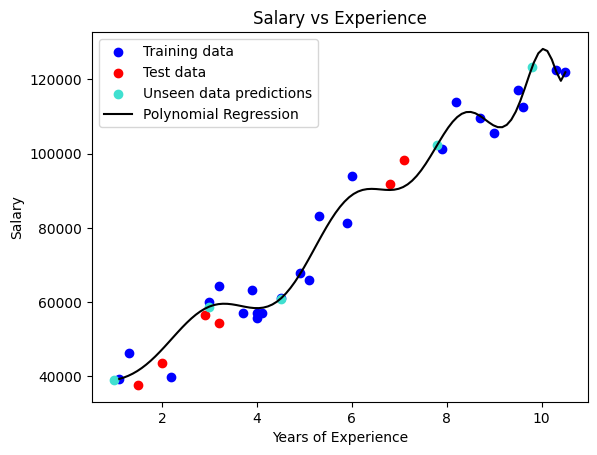

In [21]:
unseen_data = np.array([[1], [3], [4.5], [7.8], [9.8]])  
unseen_data_poly = poly.transform(unseen_data)
unseen_predictions = poly_model.predict(unseen_data_poly)

for years, salary in zip(unseen_data, unseen_predictions):
    print(f"Years of Experience: {years[0]}, Predicted Salary: {salary}")
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.scatter(unseen_data, unseen_predictions, color='turquoise', label='Unseen data predictions')
plt.plot(X_range, y_range_pred, color='black', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()